# Exercise 4.1

###Molecular Dynamics simulations, testing the Maxwell-Boltzmann distribution

I modified the provided code by completing methods for the computation of the Maxwell-Boltzmann distribution: $p(v^*,T^*) = \frac{1}{(2\pi T^*)^{3/2}} 4\pi (v^*)^2 e^{-\frac{(v^*)^2}{2 T^*}}$. This is done with monte carlo methods by evolving the simulated particle system, filling in the histogram of the velocities of the particle when a measure is requested. The code automately performs data blocking of this quantities.

/tmp/ipython-input-29-4225284445.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_temp = pd.read_csv(path + 'temperature_4_01.dat', delim_whitespace=True, comment='#', header=None)
/tmp/ipython-input-29-4225284445.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path + 'pofv_4_01.dat', delim_whitespace=True, comment='#', header=None)


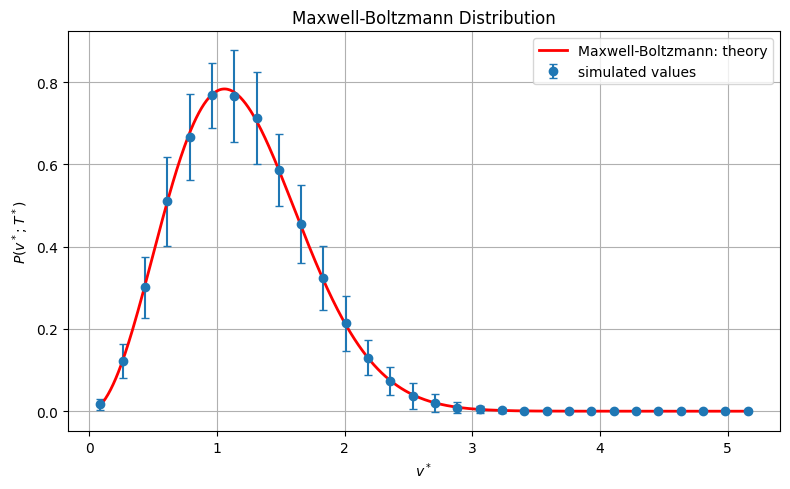

,v,P(v),error
0,0.087401,0.016871,0.000000
1,0.262202,0.124268,0.000000
2,0.437004,0.294302,0.000000
3,0.611805,0.526921,0.000000
4,0.786607,0.629391,0.000000
...,...,...,...
595,4.457440,0.000009,0.000171
596,4.632240,0.000019,0.000341
597,4.807040,0.000033,0.000609
598,4.981840,0.000000,0.000000


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = "NSL_SIMULATOR/OUTPUT/"

# --- Parametri noti (modifica se necessario) ---
df_temp = pd.read_csv(path + 'temperature_4_01.dat', delim_whitespace=True, comment='#', header=None)
df_temp.columns = ['block', 'actual T', 'T ave', 'error']

T = df_temp['T ave'][19] #Temperature evolves and stabilizes during the simulation, take the one of the last block
#T = 1.1

# Leggi il file pofv.dat
df = pd.read_csv(path + 'pofv_4_01.dat', delim_whitespace=True, comment='#', header=None)
df.columns = ['v', 'P(v)', 'error']

# Calcola la distribuzione teorica di Maxwell-Boltzmann
v_theo = np.linspace(df['v'].min(), df['v'].max(), 500)
P_theo = 4 * np.pi * v_theo**2 * (1 / (2 * np.pi * T))**(3/2) * np.exp( - v_theo**2 / (2 * T))

# Plot
plt.figure(figsize=(8, 5))
#plt.errorbar(df['v'], df['P(v)'], yerr=df['error'], fmt='o', capsize=3, label='Simulazione')
plt.errorbar(df['v'][-30:], df['P(v)'][-30:], yerr=df['error'][-30:], fmt='o', capsize=3, label='simulated values')
plt.plot(v_theo, P_theo, 'r-', lw=2, label='Maxwell-Boltzmann: theory')
plt.xlabel(r'$v^*$')
plt.ylabel(r'$P(v^*; T^*)$')
plt.title('Maxwell-Boltzmann Distribution')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

df

We can see that the simulation closely fits the theory

#EXERCISE 4.2

###Evolution from a starting distribution

perform MD simulations via a Lennard-Jones model</span> ( e.g. Argon parameters: $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
- gas phase: $\rho^\star = 0.05$, $T^\star \sim  2.0$ (cut-off radius: $r_c = 5.0$)

starting from a <span style="color:red">**very low entropic** initial configuration</span>:
1. initial **particle positions**: <span style="color:red">fcc crystal occupying half of the simulation box in each dimension</span>
2. initial **velocity distribution**: <span style="color:red">$p_\delta(v^*,T^*) = \delta\left( v^* - v_{T^*}\right)$</span> where $v_{T^*}$ is suitably connected to $T^*$. For example, this condition could be obtained by imposing that every particle has an initial velocity $\pm v_{T^*}$ for **only one** of its velocity components: $v_x$, $v_y$, $v_z$.

In order to achieve these conditions, I:
1. changed the input configuration by multiplying particle coordinates by a scale factor of 0.5.
2. cycled on every particle's velocity for every coordinate and assigning it a casual value of $\pm \sqrt{3T}$

/tmp/ipython-input-30-1564506026.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_temp = pd.read_csv(path + 'temperature_4_02.dat', delim_whitespace=True, comment='#', header=None)
/tmp/ipython-input-30-1564506026.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path + 'pofv_4_02.dat', delim_whitespace=True, comment='#', header=None)


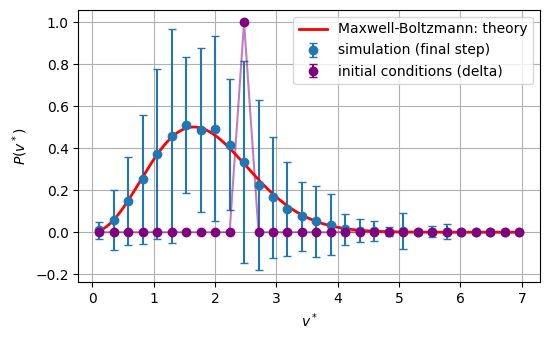

/tmp/ipython-input-30-1564506026.py:47: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(v_theo, P_theo, 'r-', lw=3, linestyle = '--', alpha = 0.5, label='Maxwell-Boltzmann')


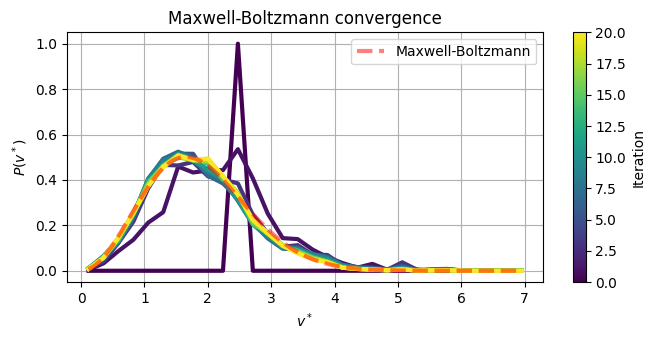

In [30]:
from matplotlib.cm import ScalarMappable

image_scale = 0.7

df_temp = pd.read_csv(path + 'temperature_4_02.dat', delim_whitespace=True, comment='#', header=None)
df_temp.columns = ['block', 'actual T', 'T ave', 'error']

T = df_temp['T ave'][19]

df = pd.read_csv(path + 'pofv_4_02.dat', delim_whitespace=True, comment='#', header=None)
df.columns = ['v', 'P(v)', 'error']

v_theo = np.linspace(df['v'].min(), df['v'].max(), 500)
P_theo = 4 * np.pi * v_theo**2 * (1 / (2 * np.pi * T))**(3/2) * np.exp( - v_theo**2 / (2 * T))

# Plot
fig, ax = plt.subplots(figsize=(8*image_scale, 5*image_scale))
ax.errorbar(df['v'][-30:], df['P(v)'][-30:], yerr=df['error'][-30:], fmt='o', capsize=3, label='simulation (final step)')
ax.errorbar(df['v'][:30], df['P(v)'][:30], yerr=df['error'][:30], fmt='o', color='purple', capsize=3, label='initial conditions (delta)')
ax.plot(df['v'][:30], df['P(v)'][:30], color='purple', alpha=0.5)
ax.plot(v_theo, P_theo, 'r-', lw=2, label='Maxwell-Boltzmann: theory')
ax.set_xlabel(r'$v^*$')
ax.set_ylabel(r'$P(v^*)$')
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()
plt.close()


n_blocks = 21

cmap = plt.cm.viridis
colors = [cmap(i) for i in np.linspace(0, 1, n_blocks)]

fig, ax = plt.subplots(figsize=(9.75*image_scale, 5*image_scale))

for i, color in enumerate(colors):
  if ((i+1)%2 != 0) and (i != 20) and (i!=0): continue  #too much data is hard on the eye
  ax.plot(df['v'][30*i:30*(i+1)], df['P(v)'][30*i:30*(i+1)], color=color, lw=3)

ax.grid(True)
ax.set_xlabel(r'$v^*$')
ax.set_ylabel(r'$P(v^*)$')
ax.set_title('Maxwell-Boltzmann convergence')

ax.plot(v_theo, P_theo, 'r-', lw=3, linestyle = '--', alpha = 0.5, label='Maxwell-Boltzmann')
ax.legend()

# Colorbar
norm = plt.Normalize(vmin=0, vmax=n_blocks -1)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Iteration")

fig.tight_layout()
plt.show()

As we can see from the plots, the initial distribution (indeed a discrete Dirac delta) rapidly evolves towards an almost perfect Maxwell-Boltzmann distribution as the system thermalizes!

If I was to change the direction of time—by inverting all particle velocities the system would trace back it trajectory to the initial condition (low entropy), given that the equations of motion are symmetric under time reversal.

This is all according to theory, but it is probable that, accounting for the discrete precisions involved in computation or study of the system, the system is too chaotic to actually observe this phenomenon in practice, and every study or simulation would rapidly diverge from the time-reversed corse it was trying to predict.

#Exercise 4.3

In order to change the direction of time, other than changing the velocities (which are not used by Verlet algorithm to compute position updates), I also swapped the definitions of $x(t)$ and $x(t - \Delta t)$, all while starting from the previous equilibrium configuration of the last simulation.

/tmp/ipython-input-31-2028160472.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_temp = pd.read_csv(path + 'temperature_4_03.dat', delim_whitespace=True, comment='#', header=None)
/tmp/ipython-input-31-2028160472.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path + 'pofv_4_03.dat', delim_whitespace=True, comment='#', header=None)


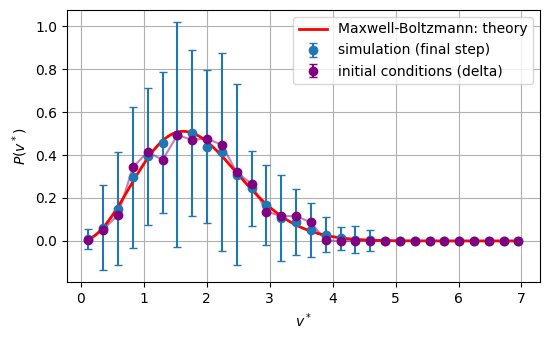

/tmp/ipython-input-31-2028160472.py:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(v_theo, P_theo, 'r-', lw=3, linestyle = '--', alpha = 0.5, label='Maxwell-Boltzmann')


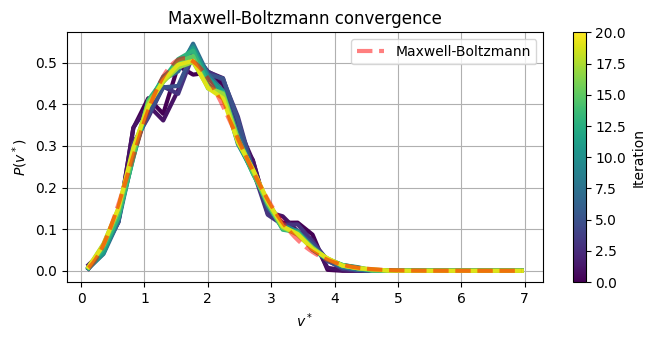

In [31]:
image_scale = 0.7

df_temp = pd.read_csv(path + 'temperature_4_03.dat', delim_whitespace=True, comment='#', header=None)
df_temp.columns = ['block', 'actual T', 'T ave', 'error']

T = df_temp['T ave'][19]

df = pd.read_csv(path + 'pofv_4_03.dat', delim_whitespace=True, comment='#', header=None)
df.columns = ['v', 'P(v)', 'error']

v_theo = np.linspace(df['v'].min(), df['v'].max(), 500)
P_theo = 4 * np.pi * v_theo**2 * (1 / (2 * np.pi * T))**(3/2) * np.exp( - v_theo**2 / (2 * T))

# Plot
fig, ax = plt.subplots(figsize=(8*image_scale, 5*image_scale))
ax.errorbar(df['v'][-30:], df['P(v)'][-30:], yerr=df['error'][-30:], fmt='o', capsize=3, label='simulation (final step)')
ax.errorbar(df['v'][:30], df['P(v)'][:30], yerr=df['error'][:30], fmt='o', color='purple', capsize=3, label='initial conditions (delta)')
ax.plot(df['v'][:30], df['P(v)'][:30], color='purple', alpha=0.5)
ax.plot(v_theo, P_theo, 'r-', lw=2, label='Maxwell-Boltzmann: theory')
ax.set_xlabel(r'$v^*$')
ax.set_ylabel(r'$P(v^*)$')
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()
plt.close()


n_blocks = 21

cmap = plt.cm.viridis
colors = [cmap(i) for i in np.linspace(0, 1, n_blocks)]

fig, ax = plt.subplots(figsize=(9.75*image_scale, 5*image_scale))

for i, color in enumerate(colors):
  if ((i+1)%2 != 0) and (i != 20) and (i!=0): continue  #too much data is hard on the eye
  ax.plot(df['v'][30*i:30*(i+1)], df['P(v)'][30*i:30*(i+1)], color=color, lw=3)

ax.grid(True)
ax.set_xlabel(r'$v^*$')
ax.set_ylabel(r'$P(v^*)$')
ax.set_title('Maxwell-Boltzmann convergence')

ax.plot(v_theo, P_theo, 'r-', lw=3, linestyle = '--', alpha = 0.5, label='Maxwell-Boltzmann')
ax.legend()

# Colorbar
norm = plt.Normalize(vmin=0, vmax=n_blocks -1)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Iteration")

fig.tight_layout()
plt.show()

As the plots show, it is impossible to travel backwards in time to the low entropy configuration effectively! As discussed before, this is probably due to the discretization imposed by computation (for example, the discrete time step $dt$) united with the fact that this simulation represents a many-body system, which is therefore highly chaotic. In these conditions all approximations in the computation sum up to deviate the state trajectory from the previous one, onto the more probable equilibration one.